# Customer Churn Analysis (Evaluation Project - 7)

Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.
    
Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.
    
Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 
    
You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

Downlaod Files:
    
https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

In [1]:
# Importing  Necessary Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

# Importing Data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
# Checking shape

data.shape

(7043, 21)

Dataset has 7043 rows and 21 columns.

In [6]:
# Columns names
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observation:
    
There are 1 float values, 18 are object types and 2 are int datatype.

Churn is one target variable and consist of categorical data.


In [8]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

# Checking Duplicate

In [9]:
#checking duplicate

data.duplicated().sum()

0

Observation:
    There is no duplicate in dataset.

# Statistical Summary

In [10]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
data.describe(include=object).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


Observation:
    
Churn is Target variable and it is categorical data.

There is No null values present in dataset.

"SeniorCitizen" is a categorical variable as it has two different value, 0 and 1.

In [12]:
data['SeniorCitizen']=data['SeniorCitizen'].astype(object)


# Checking for 'NA','-'and 'space' in dataset

In [13]:
data.isin([' ','NA','-']).sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
data['TotalCharges']= data['TotalCharges'].replace(' ',np.nan)


In [15]:
data['TotalCharges'].isin([' ','NA','-']).sum()


0

In [16]:
# Converting object datatype into float

data['TotalCharges']= data['TotalCharges'].astype(float)

In [17]:
data['TotalCharges'].isna().sum()


11

Observation:
Replace ' ' with np.NaN
No blank space, NA, '-', '?' exist in dataset.

# Checking Null Value

In [18]:
#checking null values

null_val= data.isna().sum()
null_val_per =(null_val/data.shape[0])*100
l= [null_val, null_val_per]
print("missing value details \n\n", pd.concat(l, axis =1, keys =['Null Values', 'Null Values percentage']).sort_values('Null Values'))


missing value details 

                   Null Values  Null Values percentage
customerID                  0                0.000000
MonthlyCharges              0                0.000000
PaymentMethod               0                0.000000
PaperlessBilling            0                0.000000
Contract                    0                0.000000
StreamingMovies             0                0.000000
StreamingTV                 0                0.000000
TechSupport                 0                0.000000
DeviceProtection            0                0.000000
OnlineBackup                0                0.000000
InternetService             0                0.000000
MultipleLines               0                0.000000
PhoneService                0                0.000000
tenure                      0                0.000000
Dependents                  0                0.000000
Partner                     0                0.000000
SeniorCitizen               0                0.000000
gen

<AxesSubplot:>

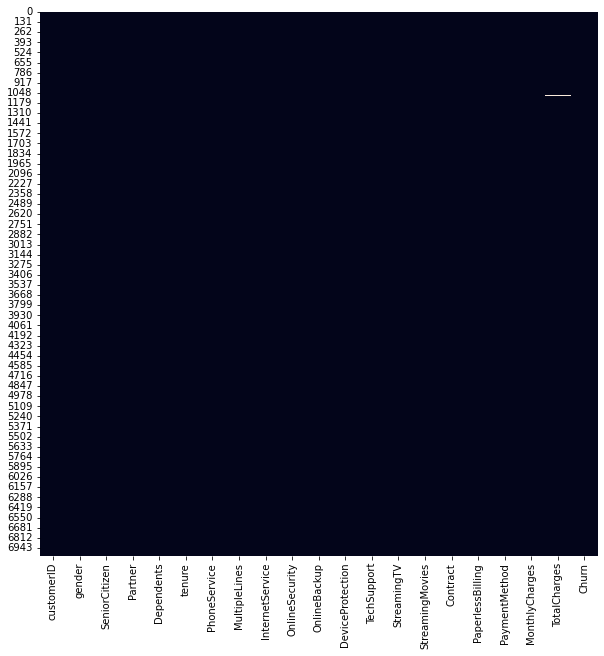

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(),cbar=False)

Observation:
There are Null values present in the total charges column.

# Imputing

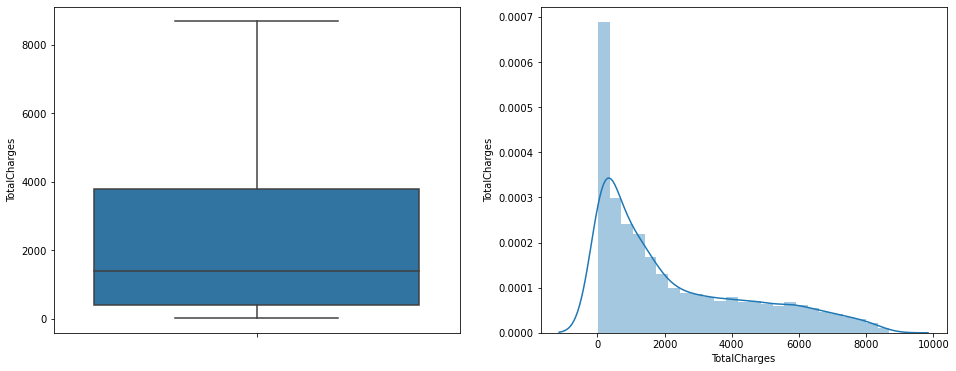

In [20]:
# Imputing Null Value

f,ax=plt.subplots(1,2,figsize=(16,6))
sns.boxplot(y = 'TotalCharges', data= data,ax=ax[0])
plt.ylabel('TotalCharges')
sns.distplot(data['TotalCharges'] ,ax=ax[1])
plt.xlabel('TotalCharges')
plt.show()

In [21]:
print("Mean of TotalCharges:",data['TotalCharges'].mean())
print("Median of TotalCharges:",data['TotalCharges'].median())

Mean of TotalCharges: 2283.3004408418697
Median of TotalCharges: 1397.475


Observation:
There is no Outliers and 'TotalCharges' feature is right skewed.

# Imputating Missing value in TotalCharges by Mean

In [22]:
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].mean())


# Dropping Unnecessary Column

In [23]:
data.drop(['customerID'],axis=1,inplace=True)


# Spliting Categorical and Numerical Data

In [24]:
data.columns.to_series().groupby(data.dtypes).groups


{int64: ['tenure'], float64: ['MonthlyCharges', 'TotalCharges'], object: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']}

In [25]:
# spliting into Numerical & Categorical 
num_features = ['tenure','MonthlyCharges', 'TotalCharges']

cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


# Exploratory Data Analysis

Categorical Data Analysis

In [26]:
for i in cat_features:
    x= data[i].value_counts()
    print("Value counts of", i, "is---\n",x)
    print("="*20)

Value counts of gender is---
 Male      3555
Female    3488
Name: gender, dtype: int64
Value counts of SeniorCitizen is---
 0    5901
1    1142
Name: SeniorCitizen, dtype: int64
Value counts of Partner is---
 No     3641
Yes    3402
Name: Partner, dtype: int64
Value counts of Dependents is---
 No     4933
Yes    2110
Name: Dependents, dtype: int64
Value counts of PhoneService is---
 Yes    6361
No      682
Name: PhoneService, dtype: int64
Value counts of MultipleLines is---
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Value counts of InternetService is---
 Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
Value counts of OnlineSecurity is---
 No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
Value counts of OnlineBackup is---
 No                     3088
Yes                    2429
No internet service    1526

In [27]:
import squarify
for i in cat_features:
    plt.figure(figsize=(8, 6))
    reln = data[i].value_counts()
    squarify.plot(sizes=reln.values, value=reln.values, label=reln.index)
    plt.title('Relationship distribution', fontdict={'fontsize': 12, 'fontweight': 'bold'})
    plt.show()

ModuleNotFoundError: No module named 'squarify'

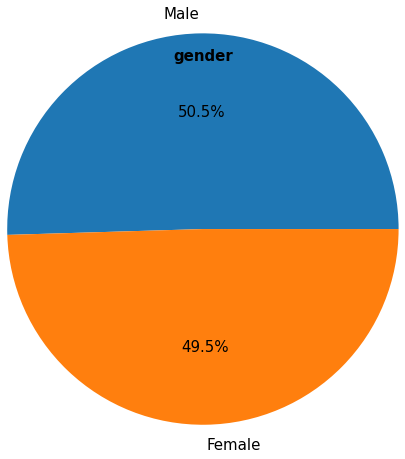

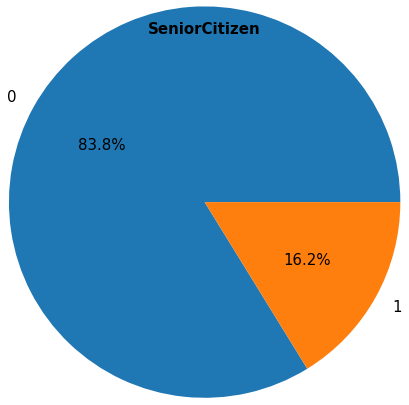

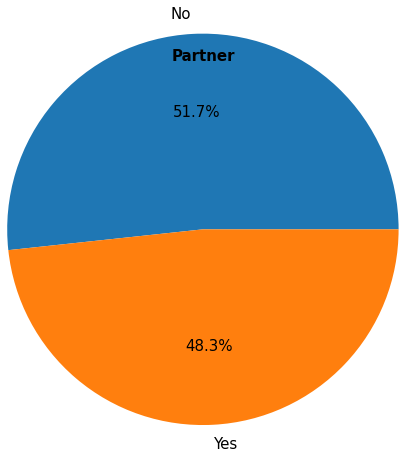

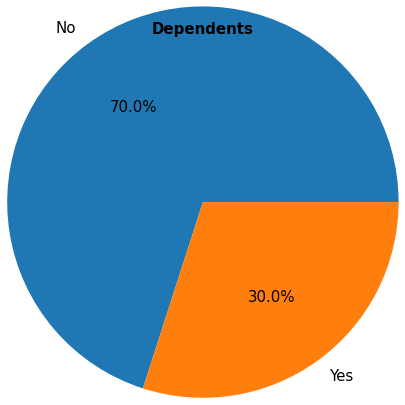

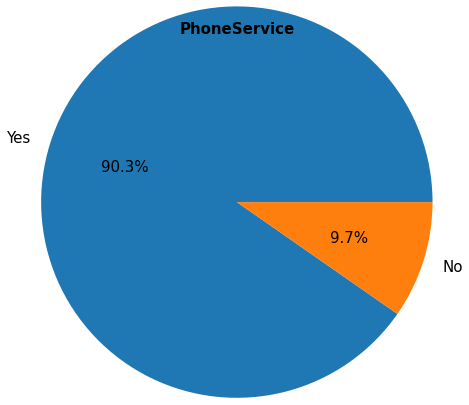

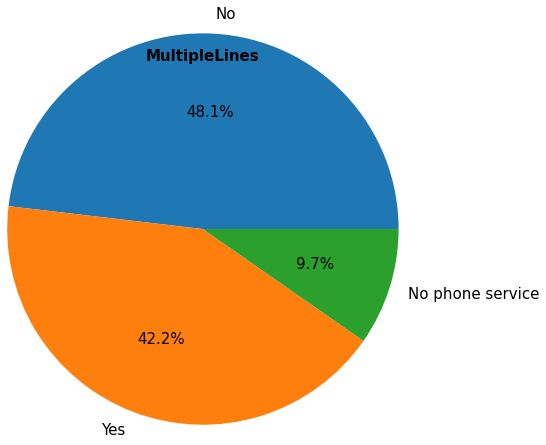

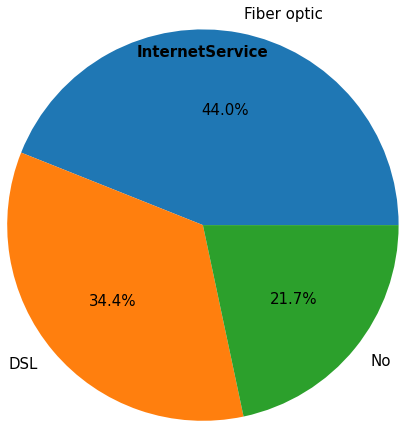

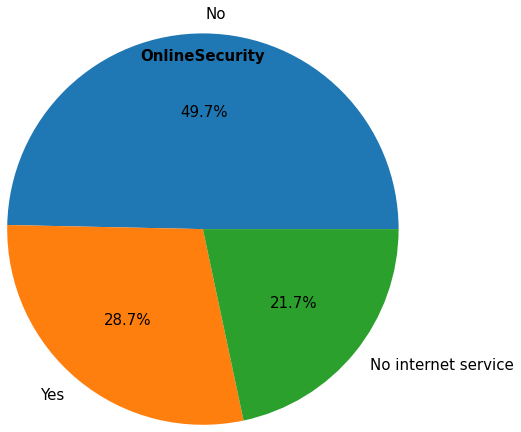

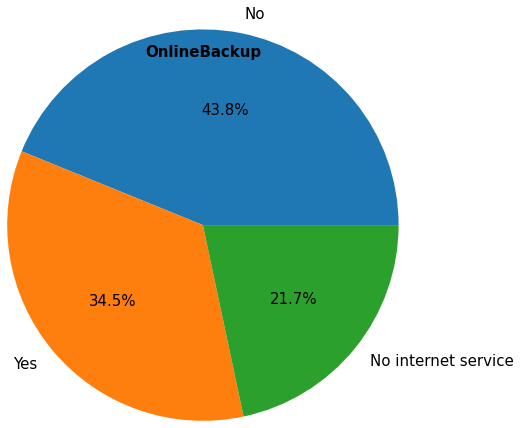

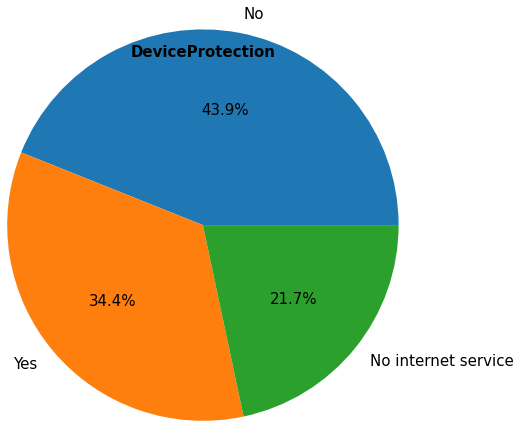

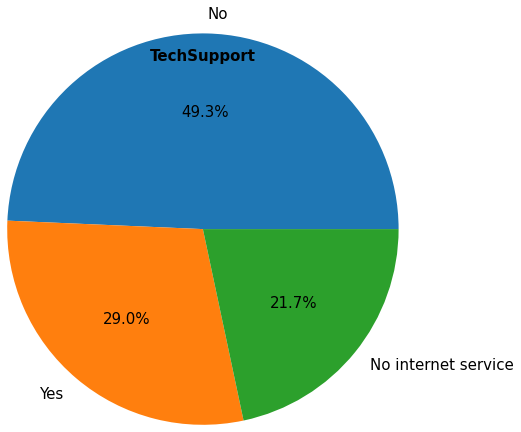

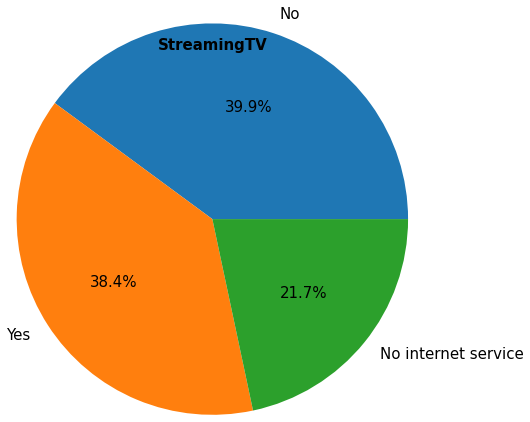

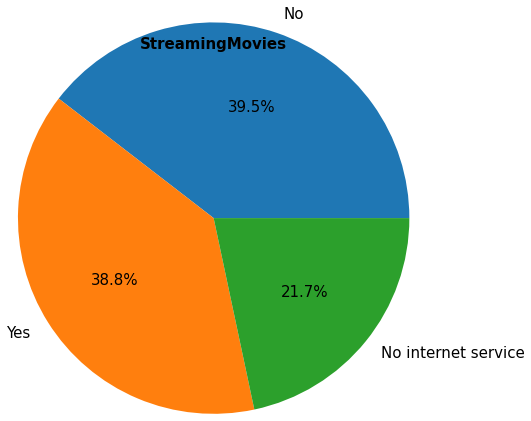

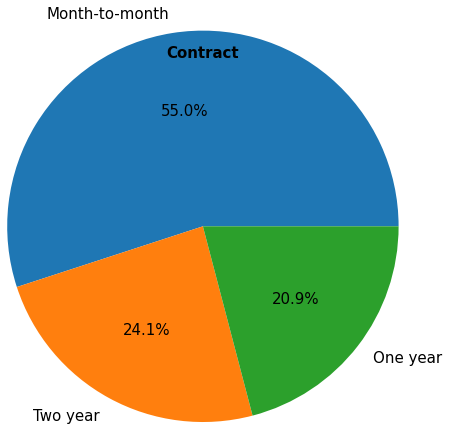

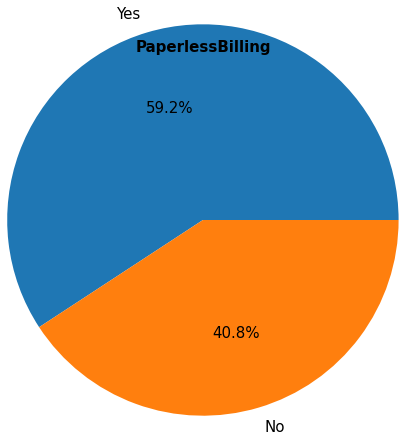

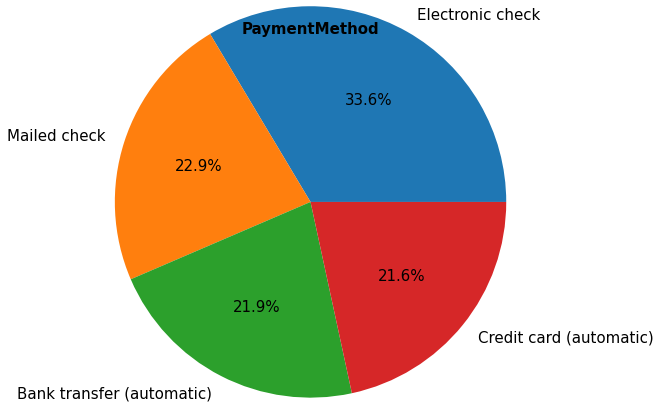

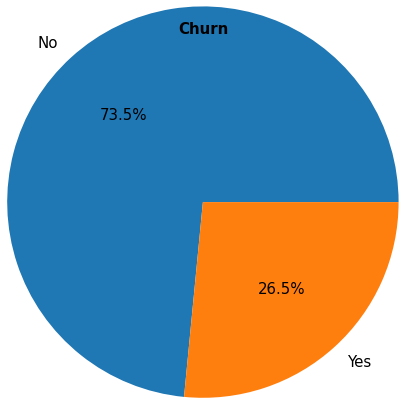

In [28]:
for i in cat_features:
    plt.figure(figsize=(6,6))
    data[i].value_counts().plot.pie(radius =1.5, textprops ={ 'fontsize':15}, autopct='%2.1f%%')
    plt.title(i,fontsize =15,fontweight ='bold')
    plt.ylabel(' ')
    plt.show()

Observation:

    Distribution of target variable Churn is quite imbalance.

    Senior citizen customers are 16%. 

    customer having dependents on them are 30%. 

    Customer perfer month to month contract are 55%.

    Customer having partners are 50%. 

    Customer perfer paperless billing are 60%.


Numerical Data Analysis

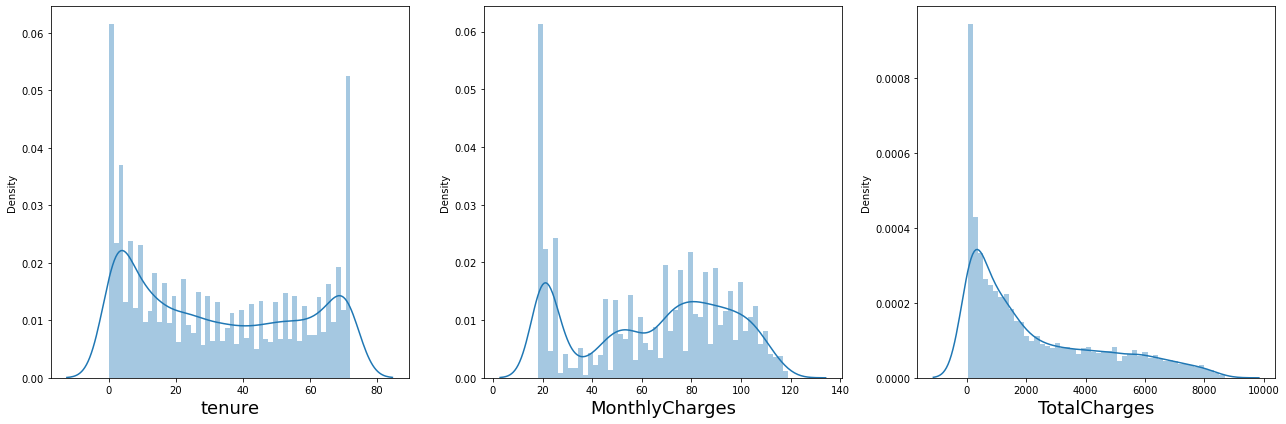

In [29]:
i=0
plt.figure(figsize=(18,6))
for p in num_features:
    plt.subplot(1,3,i+1)
    sns.distplot(data[p], bins=50)
    plt.xlabel(p,fontsize=18)
    i+=1  
plt.tight_layout()

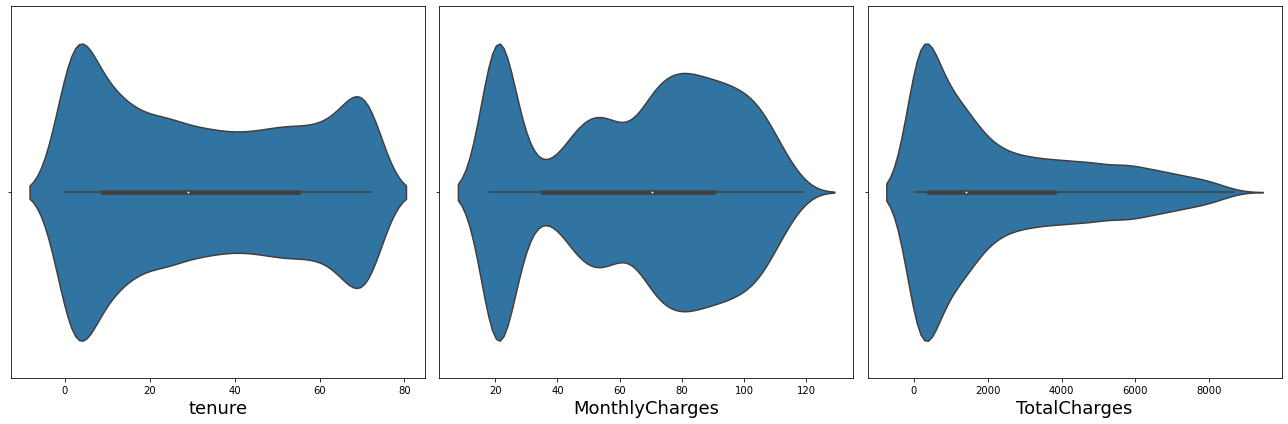

In [30]:
i=0
plt.figure(figsize=(18,6))
for p in num_features:
    plt.subplot(1,3,i+1)
    sns.violinplot(data[p])
    plt.xlabel(p,fontsize=18)
    i+=1 
plt.tight_layout()
plt.show()

Observation:
    
    Right skewness is present in data.
    
    zero value is present in TotalCharges column.

    Average range of age is 0-70.

    Range of Monthly charges is 20-120.


Target Analysis

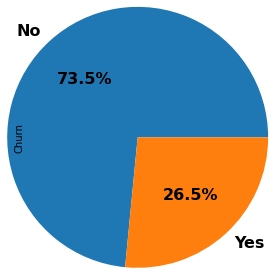

In [31]:
data['Churn'].value_counts().plot.pie(radius =1.5, textprops ={ 'fontsize':16,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

Observation :
Customers choose not to Churn the service in last month are 73.5% and rest 26.5% choose to churn service.


# Bivariate Analysis

Churn and Gender

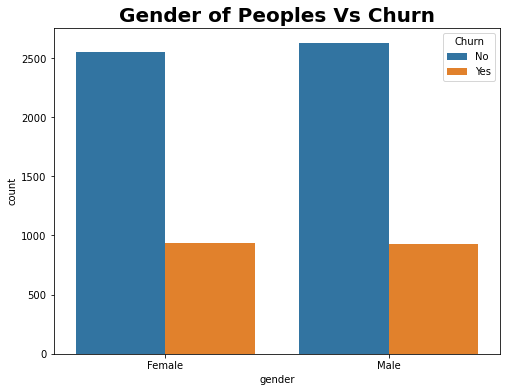

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(data['gender'], hue= data['Churn'])
plt.title('Gender of Peoples Vs Churn', fontsize=20, fontweight='bold')
plt.show()

In [33]:
pd.crosstab(data['Churn'],data["gender"], margins= True)


gender,Female,Male,All
Churn,,,
No,2549,2625,5174
Yes,939,930,1869
All,3488,3555,7043


Observation:
Distribution of Churn is in same proportion in terms of gender with minor difference.
Ratio For Male, YES: NO= 26:74 and ratio for Female, YES: NO= 27:73

Churn and Partner

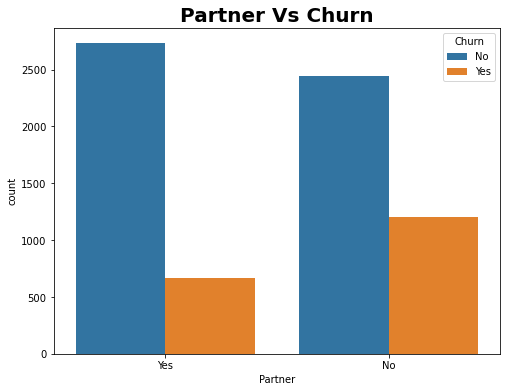

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(data['Partner'], hue= data['Churn'])
plt.title('Partner Vs Churn', fontsize=20, fontweight='bold')
plt.show()

In [35]:
pd.crosstab([data.gender,data.Partner],data["Churn"],margins=True)


Churn             No   Yes   All
gender Partner                  
Female No       1180   620  1800
       Yes      1369   319  1688
Male   No       1261   580  1841
       Yes      1364   350  1714
All             5174  1869  7043

Observation:
Customer having Partner have low tendency to Churn.
The customer not having partner have high tendency to Churn.

Churn and Dependent

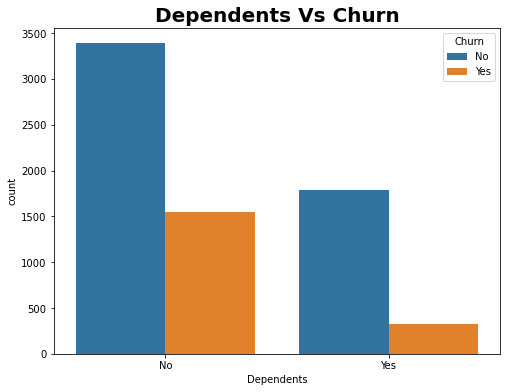

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(data['Dependents'], hue= data['Churn'])
plt.title('Dependents Vs Churn', fontsize=20, fontweight='bold')
plt.show()

In [37]:
pd.crosstab([data.Dependents],data["Churn"],margins=True)


Churn,No,Yes,All
Dependents,,,
No,3390,1543,4933
Yes,1784,326,2110
All,5174,1869,7043


Observation:
Customers who have no dependents have tendency to Churn are only 30%.
Dependent customers around 85% have more tendency to Churn.

Churn and Senior Citizen

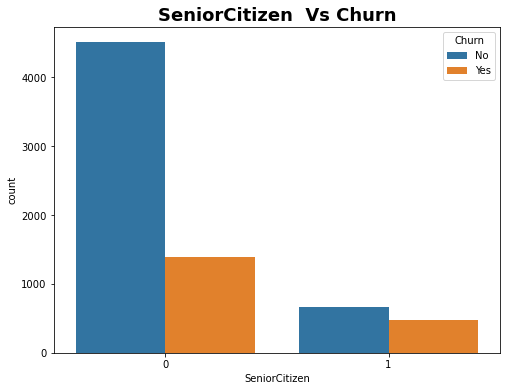

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(data['SeniorCitizen'], hue= data['Churn'])
plt.title('SeniorCitizen  Vs Churn', fontsize=18, fontweight='bold')
plt.show()

In [39]:
pd.crosstab(data["SeniorCitizen"],data['Churn'], margins= True)


Churn,No,Yes,All
SeniorCitizen,,,
0,4508,1393,5901
1,666,476,1142
All,5174,1869,7043


In [40]:
pd.crosstab([data.gender,data.SeniorCitizen ],data["Churn"],margins=True)


Churn                   No   Yes   All
gender SeniorCitizen                  
Female 0              2221   699  2920
       1               328   240   568
Male   0              2287   694  2981
       1               338   236   574
All                   5174  1869  7043

Observation:
There is high tendency of churn in Senior citizens.

Churn and Tenure

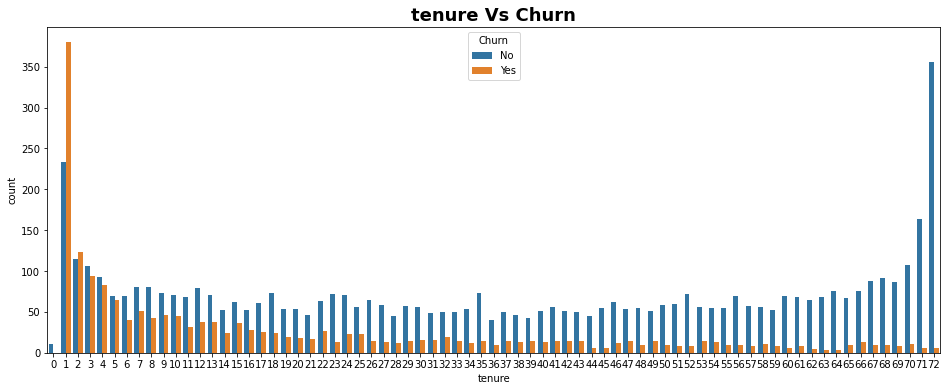

In [41]:
plt.figure(figsize=(16,6))
sns.countplot(data['tenure'], hue= data['Churn'])
plt.title('tenure Vs Churn', fontsize=18, fontweight='bold')
plt.show()

Observation:The number of customer with the tendency to Churn i tenure 1 is much greater than the number of customer who have no tendency to Churn.

Churn and Phone Service

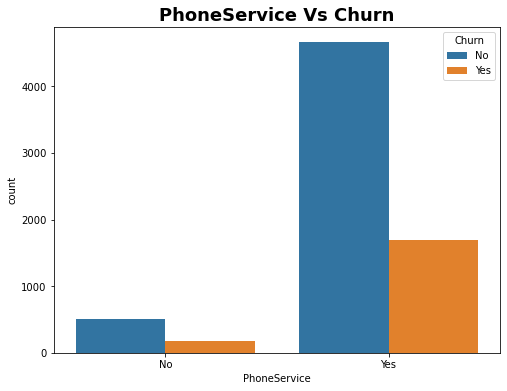

In [42]:
plt.figure(figsize=(8,6))
sns.countplot(data['PhoneService'], hue= data['Churn'])
plt.title('PhoneService Vs Churn', fontsize=18, fontweight='bold')
plt.show()

In [43]:
pd.crosstab([data.PhoneService],data["Churn"],margins=True)


Churn,No,Yes,All
PhoneService,,,
No,512,170,682
Yes,4662,1699,6361
All,5174,1869,7043


Observation:There is no relation between Churn and phoneservice.

Churn and Internet Service

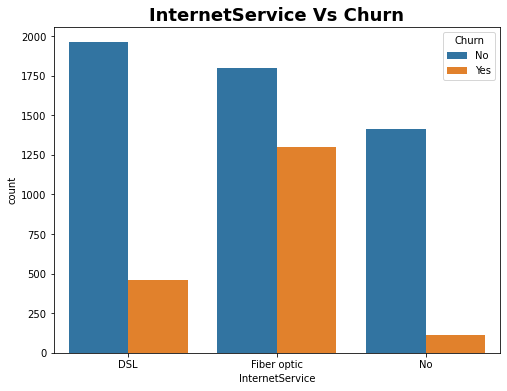

In [44]:
plt.figure(figsize=(8,6))
sns.countplot(data['InternetService'], hue= data['Churn'])
plt.title('InternetService Vs Churn', fontsize=18, fontweight='bold')
plt.show()

In [45]:
pd.crosstab([data.InternetService],data["Churn"],margins=True)


Churn,No,Yes,All
InternetService,,,
DSL,1962,459,2421
Fiber optic,1799,1297,3096
No,1413,113,1526
All,5174,1869,7043


Observation:

Total 3096 Fiber Optic connection are there in which only 1297 customer have tendency to Churn.

Churn and Online Backup

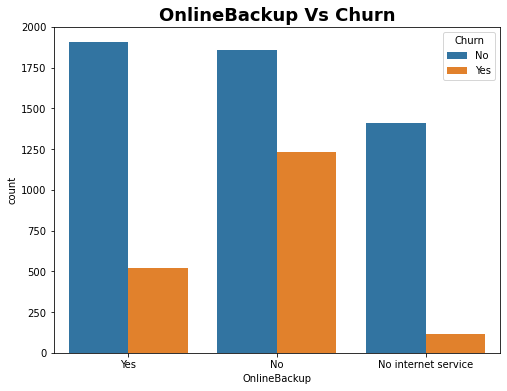

In [46]:
plt.figure(figsize=(8,6))
sns.countplot(data['OnlineBackup'], hue= data['Churn'])
plt.title('OnlineBackup Vs Churn', fontsize=18, fontweight='bold')
plt.show()

Observations:
The tendency of churn increased if the customer have no Online Backup.

Churn and Device Protection

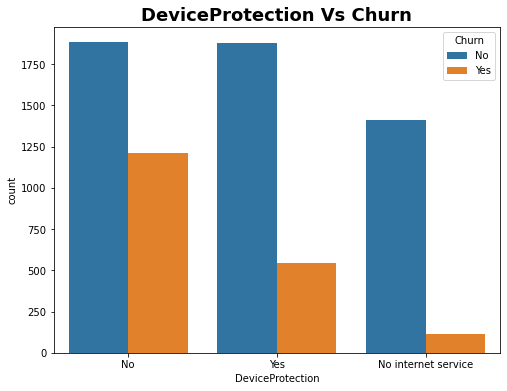

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(data['DeviceProtection'], hue= data['Churn'])
plt.title('DeviceProtection Vs Churn', fontsize=18, fontweight='bold')
plt.show()

Observation:
The customer with no device protection have high tendence to Chunk.

Churn and Tech Support

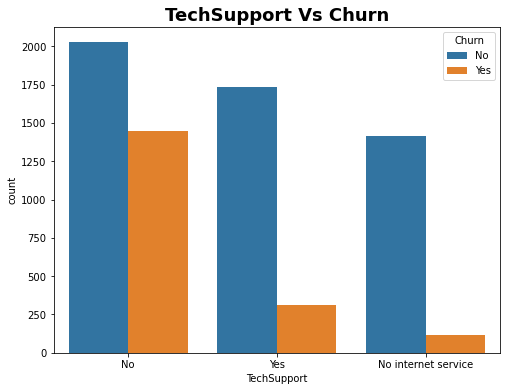

In [48]:
plt.figure(figsize=(8,6))
sns.countplot(data['TechSupport'], hue= data['Churn'])
plt.title('TechSupport Vs Churn', fontsize=18, fontweight='bold')
plt.show()

Observations:
The customer with no tech support have high tendence to Chunk.

 Churn and Streaming Movies

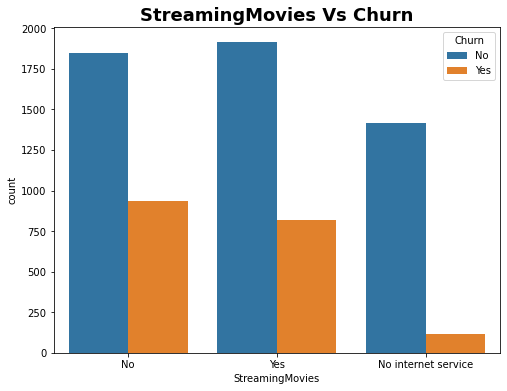

In [49]:
plt.figure(figsize=(8,6))
sns.countplot(data['StreamingMovies'], hue= data['Churn'])
plt.title('StreamingMovies Vs Churn', fontsize=18, fontweight='bold')
plt.show()

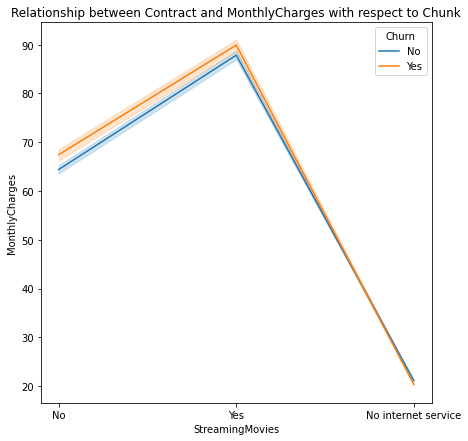

In [50]:
plt.figure(figsize=(7,7))
sns.lineplot(x="StreamingMovies", y='MonthlyCharges',data=data,hue="Churn")
plt.title("Relationship between Contract and MonthlyCharges with respect to Chunk")
plt.show()

Observation: People have same churn tendency wheather they stream movies or not.

Churn and Contract

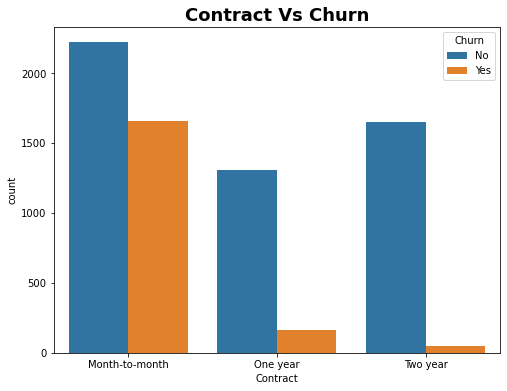

In [51]:
plt.figure(figsize=(8,6))
sns.countplot(data['Contract'], hue= data['Churn'])
plt.title('Contract Vs Churn', fontsize=18, fontweight='bold')
plt.show()

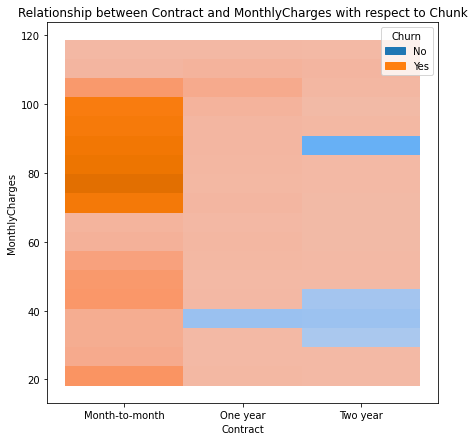

In [52]:
plt.figure(figsize=(7,7))
sns.histplot(x="Contract", y='MonthlyCharges',data=data,hue="Churn")
plt.title("Relationship between Contract and MonthlyCharges with respect to Chunk")
plt.show()

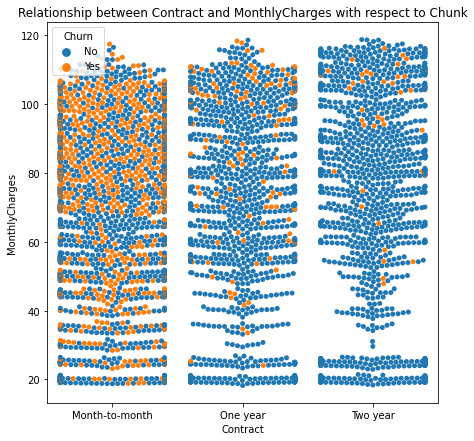

In [53]:
plt.figure(figsize=(7,7))
sns.swarmplot(x="Contract", y='MonthlyCharges',data=data,hue="Churn")
plt.title("Relationship between Contract and MonthlyCharges with respect to Chunk")
plt.show()

Observation:
There is a high churn rate in the customer if contract is month to month type.
MonthlyCharges and Contract has no relation.

Churn and Payment Method

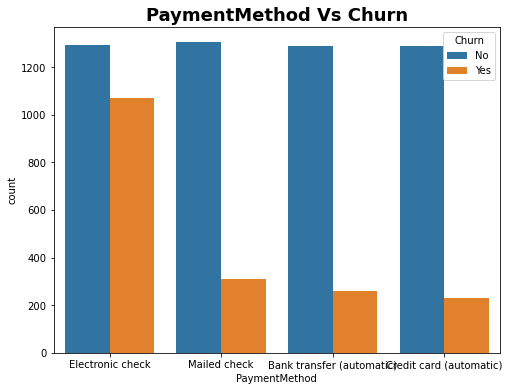

In [54]:
plt.figure(figsize=(8,6))
sns.countplot(data['PaymentMethod'], hue= data['Churn'])
plt.title('PaymentMethod Vs Churn', fontsize=18, fontweight='bold')
plt.show()

Observation: If payment method is Electronic Check there is high tendency of churn in customer.


Churn and Paperless Billing

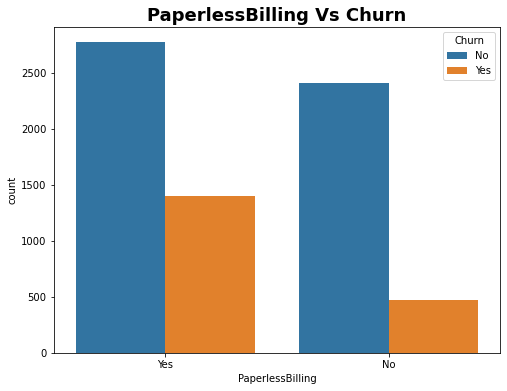

In [55]:
plt.figure(figsize=(8,6))
sns.countplot(data['PaperlessBilling'], hue= data['Churn'])
plt.title('PaperlessBilling Vs Churn', fontsize=18, fontweight='bold')
plt.show()

Observation:
The customers who prefer paperless billing they have high rate to churn.

Churn and Monthly Charges

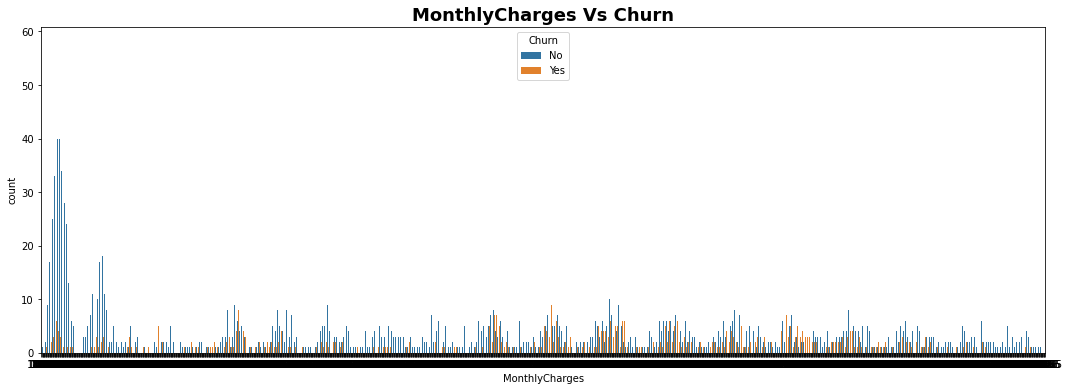

In [56]:
plt.figure(figsize=(18,6))
sns.countplot(data['MonthlyCharges'], hue= data['Churn'])
plt.title('MonthlyCharges Vs Churn', fontsize=18, fontweight='bold')
plt.show()

Observation: If MonthlyCharges is high, then the customers are more tendence to choose churn.

Churn and Total Charges

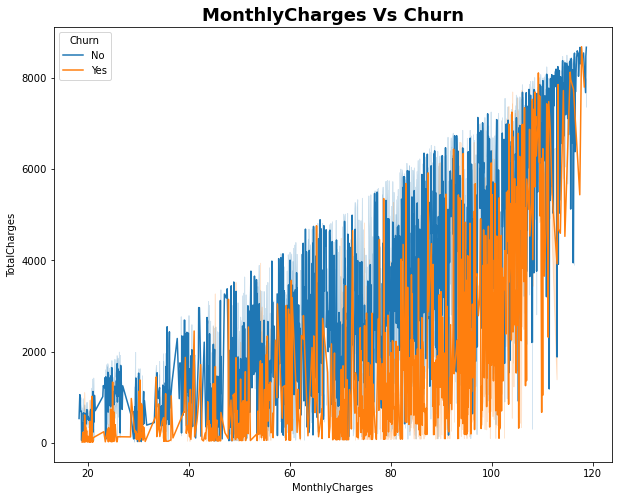

In [57]:
plt.figure(figsize=(10,8))
sns.lineplot(y="TotalCharges", x='MonthlyCharges',data=data,hue="Churn")
plt.title('MonthlyCharges Vs Churn', fontsize=18, fontweight='bold')
plt.show()

Observation:  If TotalCharges is high, then the customers are more tendence to choose churn.

# Correlation Matrix

In [58]:
data.corr().T

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.824757
MonthlyCharges,0.247900,1.000000,0.650468
TotalCharges,0.824757,0.650468,1.000000


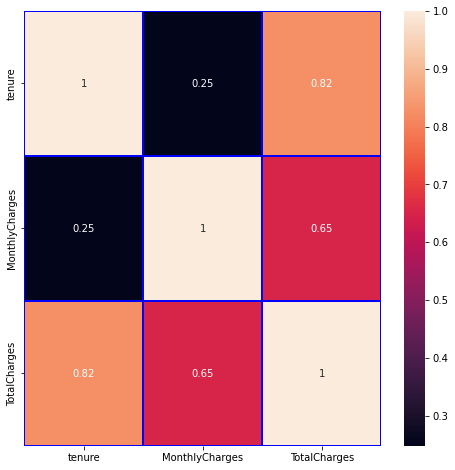

In [59]:
plt.subplots(figsize=(8,8))
sns.heatmap(data.corr(), annot= True, linecolor= "blue",  linewidths= 1.5)
plt.show()

Observation:
Correlation is high between total charges and tenure.

# Encoding

In [60]:
# Using Label Encoder for categorical features

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cat_features:
    data[i] = le.fit_transform(data[i])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Correlation Matrix after Encoding

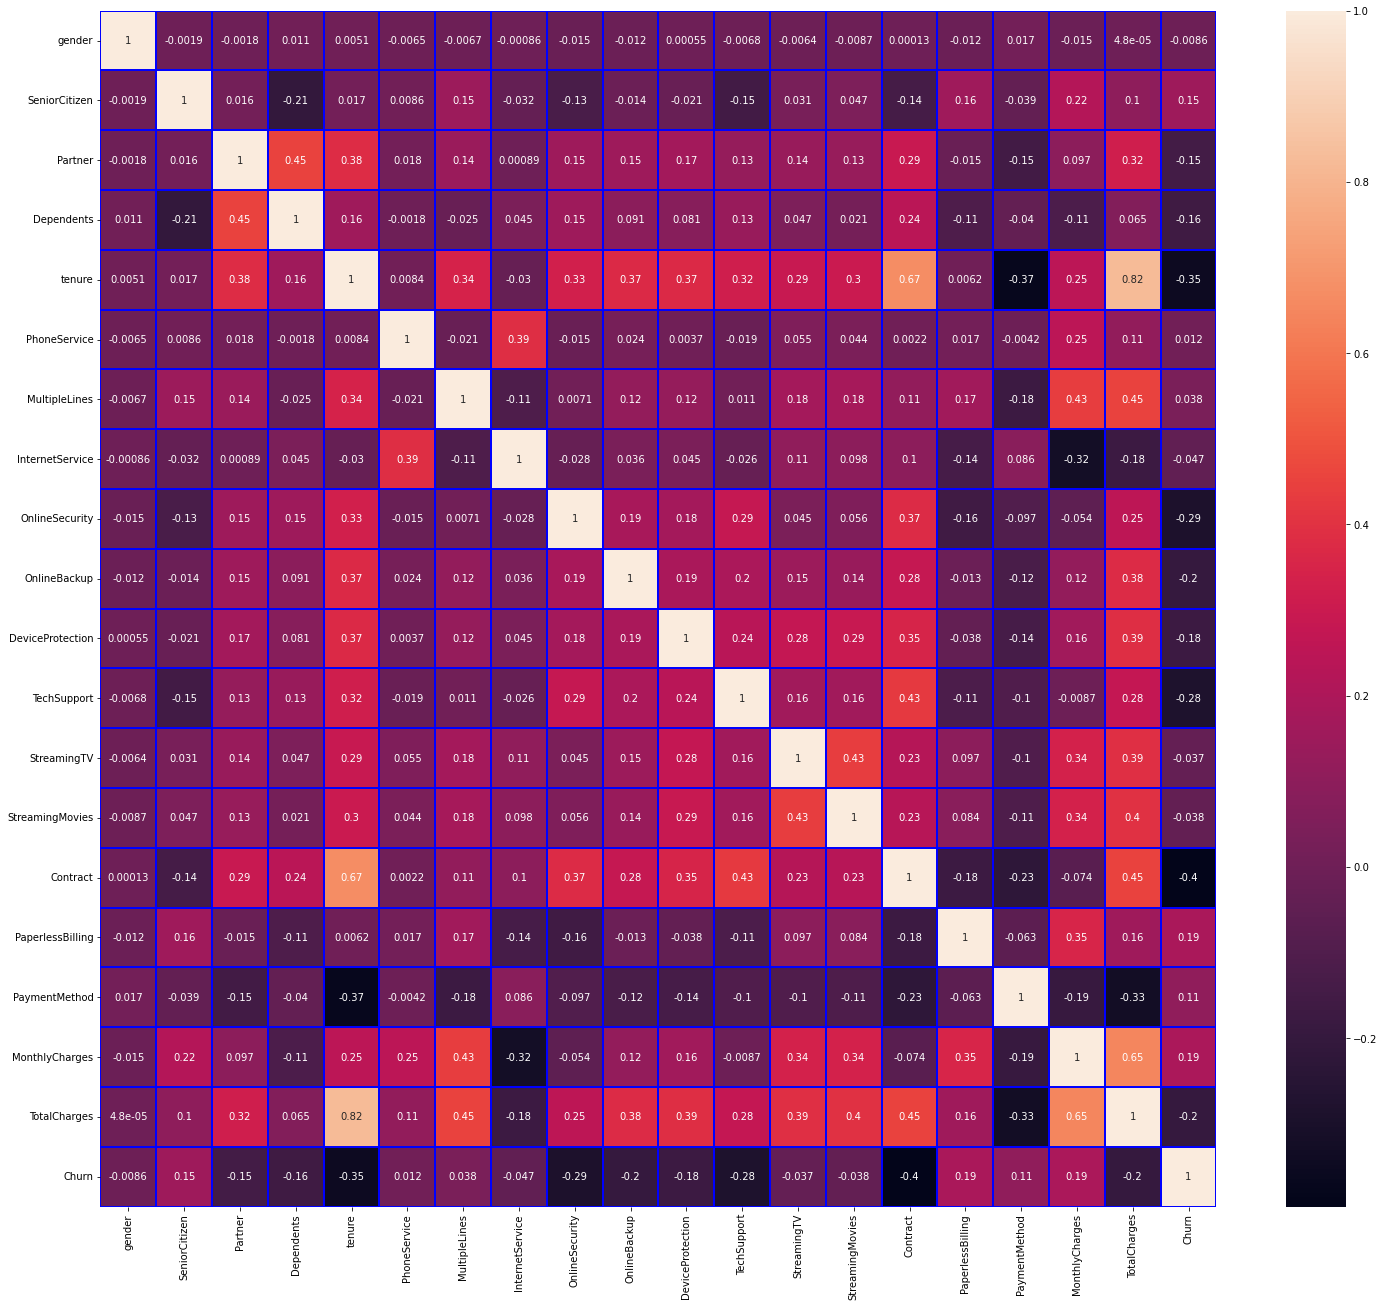

In [62]:
plt.subplots(figsize=(25,22))
sns.heatmap(data.corr(), annot= True, linecolor= "blue",  linewidths= 1.5)
plt.show()


Observation:
    
    All the features are correlated with each other

    Churn has a highly negative relationship with Contract.

    Paperless billing and monthly charges are positively correlated with churn.


# Checking Outliers

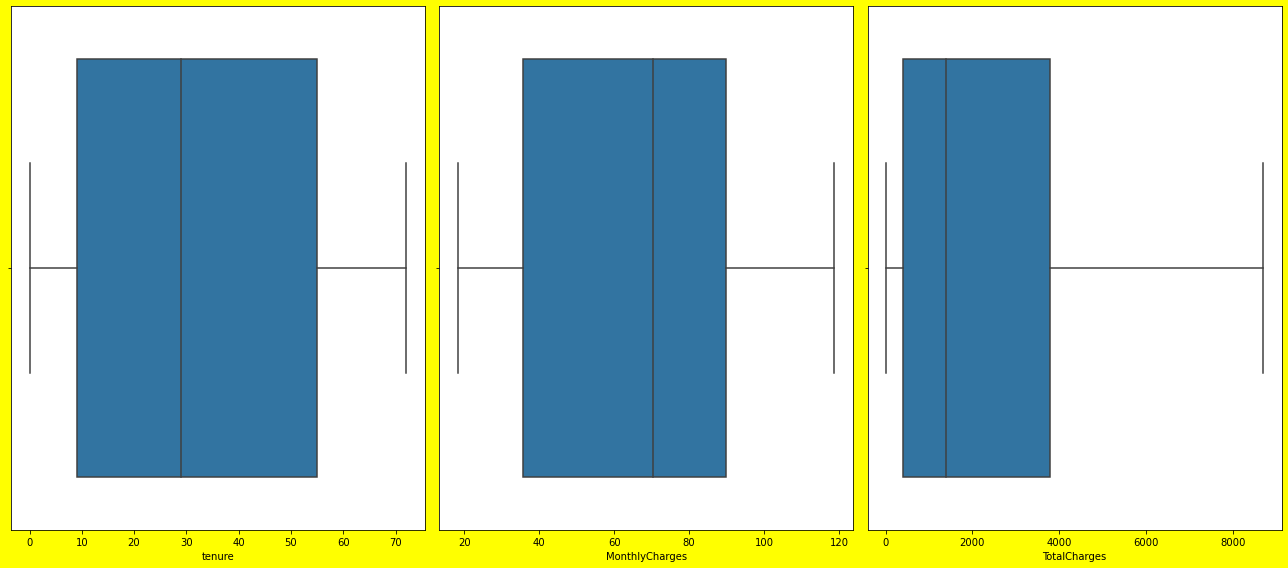

In [63]:
plt.figure(figsize=(18,8),facecolor='yellow')
pltno=1
for x in num_features:
    if pltno<=3:
        ax=plt.subplot(1,3,pltno)
        sns.boxplot(data[x])
    pltno+=1
plt.tight_layout()
plt.show()

In [64]:
num_features

['tenure', 'MonthlyCharges', 'TotalCharges']

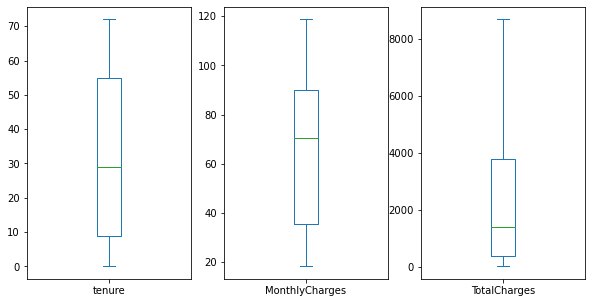

In [65]:
data[['tenure', 'MonthlyCharges', 'TotalCharges']].plot(kind ='box', subplots =True , layout =(1,3), figsize = (10,5))
plt.show()

Observtation:
There is no outliers present in the dataset.

# Checking Skewness

In [66]:
data.skew().sort_values()

PhoneService       -2.727153
PaperlessBilling   -0.375396
MonthlyCharges     -0.220524
PaymentMethod      -0.170129
gender             -0.019031
StreamingMovies     0.014657
StreamingTV         0.028486
Partner             0.067922
MultipleLines       0.118719
OnlineBackup        0.182930
DeviceProtection    0.186847
InternetService     0.205423
tenure              0.239540
TechSupport         0.402365
OnlineSecurity      0.416985
Contract            0.630959
Dependents          0.875199
TotalCharges        0.962394
Churn               1.063031
SeniorCitizen       1.833633
dtype: float64

In [67]:
data[['tenure', 'MonthlyCharges', 'TotalCharges']].skew().sort_values()


MonthlyCharges   -0.220524
tenure            0.239540
TotalCharges      0.962394
dtype: float64

Observation:
TotalCharges have some skewness and Monthly Charges,Tenure have no sknewness.

In [68]:
data1= data.copy()

In [69]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [70]:
data[['TotalCharges']] = scaler.fit_transform(data[['TotalCharges']].values)
data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,-1.810588,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0.253313,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,-1.387269,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0.232253,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,-1.250118,1


In [71]:
data[['tenure', 'MonthlyCharges', 'TotalCharges']].skew().sort_values()


MonthlyCharges   -0.220524
TotalCharges     -0.144899
tenure            0.239540
dtype: float64

# Balancing Target

In [72]:
# Using SMOTE
from imblearn.over_sampling import SMOTE
ovrs = SMOTE()

# Splitting data in target and features
x = data.drop(['Churn'], axis =1)
y = data['Churn']

In [73]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [74]:
x,y = ovrs.fit_resample(x,y)
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

# Checking Multicollinearity

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(data.values,i)for i in range(data.shape[1])]
vif["Features"] = data.columns
vif

,VIF,Features
0,1.992203,gender
1,1.372640,SeniorCitizen
2,2.821218,Partner
3,1.961200,Dependents
4,13.497891,tenure
5,16.014903,PhoneService
6,2.756853,MultipleLines
7,4.478147,InternetService
8,2.287594,OnlineSecurity
9,2.445350,OnlineBackup


Observation: In some features we can see multicollinearity is present.

# PCA

In [76]:
# Using Principal Component Analysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA()
scaler= StandardScaler()
x_scale = scaler.fit_transform(x)

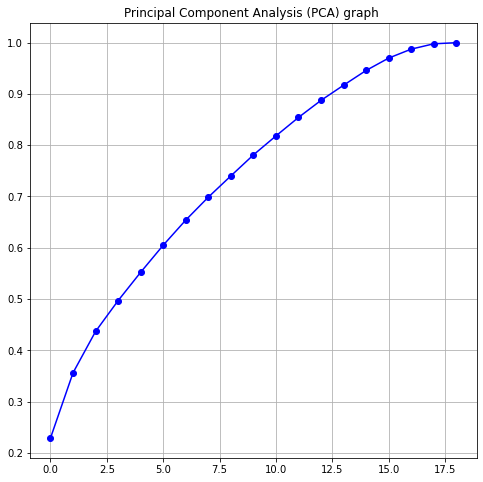

In [77]:
x_pca = pca.fit_transform(x_scale)
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.title('Principal Component Analysis (PCA) graph ')
plt.grid()

Observation:
    There is almost 96% variance in 14 components.

In [78]:
pca_new = PCA(n_components=14)
x_scale_new = pca_new.fit_transform(x_scale)
prin_x=pd.DataFrame(x_scale_new )
prin_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-2.346075,0.801331,2.880020,-0.166444,0.697863,-0.934702,1.202470,0.990988,-2.103846,-1.231445,-0.092368,-0.088050,0.019671,0.229426
1,-0.491814,1.590140,0.690183,0.771231,0.075094,1.310424,-0.960592,0.368467,1.083922,1.926254,0.556855,-1.257690,-1.647610,-1.209104
2,-2.206654,0.915018,0.719292,-0.120137,-0.072362,1.277341,-1.281747,2.516434,-0.309780,-0.034347,0.478127,0.474434,-1.533227,0.339366
3,0.812139,2.272947,3.374359,2.230012,0.041859,1.180942,-0.537454,-1.467656,0.840403,0.060374,-0.540600,-0.986426,-0.209857,0.805819
4,-2.957639,-0.371635,-0.220553,-0.291220,-0.859510,-0.615994,-0.257608,0.449439,0.402424,-0.507168,-0.139095,-0.341230,0.046936,-0.586222


# Using  Classification ML Models

Find best Random State

In [79]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

from sklearn.linear_model import LogisticRegression

acc_max=0
random_max=0
for i in range(400, 1500):
    x_train,x_test,y_train,y_test = train_test_split(x_scale_new,y,test_size = 0.25, random_state=i)
    log= LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    if acc>acc_max:
        acc_max=acc
        random_max=i
        
print('Best accuracy is', acc_max ,'on Random_state', random_max)

Best accuracy is 0.8059528411287206 on Random_state 1085


In [80]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (7761, 14)
Training target shape: (7761,)
Test feature shape: (2587, 14)
Test target shape: (2587,)


# Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(x_scale_new,y,test_size = 0.25, random_state=1261)

log = LogisticRegression()

log.fit(x_train, y_train)

y_pred = log.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', log.score(x_train, y_train))
print('testing score : ', log.score(x_test, y_test))

accu score :  0.8028604561267878
cof_mat:
  [[ 984  308]
 [ 202 1093]]
classification report:
                precision    recall  f1-score   support

           0       0.83      0.76      0.79      1292
           1       0.78      0.84      0.81      1295

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587

-----------
-----------
training score :  0.7812137611132586
testing score :  0.8028604561267878


 Hyperparameter tuning

In [82]:
# Using GridSearchCV

from sklearn.model_selection import GridSearchCV
grid = dict(solver=['newton-cg', 'lbfgs', 'liblinear', 'sag'],penalty=['l2','l1'], C=[1.0, 0.1,0.01,0.001]
           , max_iter=[100, 140, 80])

grid_log = GridSearchCV(estimator=log, param_grid= grid, cv=5 )

grid_log.fit(x_train, y_train)
print('best params : ', grid_log.best_params_)

best params :  {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'}


In [83]:
grid_log_best = grid_log.best_estimator_
grid_log_best.fit(x_train, y_train)

y_pred = grid_log_best.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', grid_log_best.score(x_train, y_train))
print('testing score : ', grid_log_best.score(x_test, y_test))

accu score :  0.8032470042520293
cof_mat:

  [[ 984  308]
 [ 201 1094]]
classification report:
                precision    recall  f1-score   support

           0       0.83      0.76      0.79      1292
           1       0.78      0.84      0.81      1295

    accuracy                           0.80      2587
   macro avg       0.81      0.80      0.80      2587
weighted avg       0.81      0.80      0.80      2587

-----------
-----------
training score :  0.7813426104883391
testing score :  0.8032470042520293


Observation:
    Accuracy score not improved after using gridsearchCV.

# GradientBoosting Classifier

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', gbdt.score(x_train, y_train))
print('testing score : ', gbdt.score(x_test, y_test))

accu score :  0.8047931967529958


cof_mat:  [[ 990  302]
 [ 203 1092]]


classification report: 

               precision    recall  f1-score   support

           0       0.83      0.77      0.80      1292
           1       0.78      0.84      0.81      1295

    accuracy                           0.80      2587
   macro avg       0.81      0.80      0.80      2587
weighted avg       0.81      0.80      0.80      2587

-----------
-----------
training score :  0.8229609586393506
testing score :  0.8047931967529958


Hyperparameter tuning

In [85]:
# Using GridSearchCV

param= {"min_samples_split" : [2,3],"learning_rate": [0.1,0.01,1.0], 
        "min_samples_leaf" :[1,2], "criterion":['friedman_mse', 'squared_error'] }

grid_gbdt= GridSearchCV (gbdt, param_grid= param,cv=5)

grid_gbdt.fit(x_train, y_train)
print('best params : ', grid_gbdt.best_params_)

best params :  {'criterion': 'squared_error', 'learning_rate': 0.1, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [86]:
grid_gbdt_best = grid_gbdt.best_estimator_
grid_gbdt_best.fit(x_train, y_train)

y_pred = grid_gbdt_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report:\n\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_gbdt_best.score(x_train, y_train))
print('testing score : ', grid_gbdt_best.score(x_test, y_test))

accu score :  0.8020873598763046


cof_mat:  [[ 996  296]
 [ 216 1079]]


classification report:

                precision    recall  f1-score   support

           0       0.82      0.77      0.80      1292
           1       0.78      0.83      0.81      1295

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587

-----------
-----------
training score :  0.8245071511403169
testing score :  0.8020873598763046


Observation:
    Accuracy score,training score not improved after using gridsearchCV.

# Extra Trees Classifier

In [87]:
from sklearn.ensemble import ExtraTreesClassifier

etc =ExtraTreesClassifier()
etc.fit(x_train, y_train)

y_pred = etc.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', etc.score(x_train, y_train))
print('testing score : ', etc.score(x_test, y_test))

accu score :  0.8160030923850019


cof_mat:  [[1059  233]
 [ 243 1052]]


classification report:                precision    recall  f1-score   support

           0       0.81      0.82      0.82      1292
           1       0.82      0.81      0.82      1295

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587

-----------
-----------
training score :  0.9985826568741142
testing score :  0.8160030923850019


Hyperparameter tuning

In [88]:
# Using GridSearchCV

params = {'n_estimators' : [100,80, 150], 'min_samples_leaf': [1,2],
          'criterion' : ["gini", "entropy"]}

etc_grd = GridSearchCV(etc, param_grid = params, cv=5)

etc_grd.fit(x_train, y_train)
print('best params : ', etc_grd.best_params_)

best params :  {'criterion': 'entropy', 'min_samples_leaf': 2, 'n_estimators': 80}


In [89]:
grid_etc_best = etc_grd.best_estimator_
grid_etc_best.fit(x_train, y_train)

y_pred = grid_etc_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_etc_best.score(x_train, y_train))
print('testing score : ', grid_etc_best.score(x_test, y_test))

accu score :  0.820641669887901


cof_mat:  [[1047  245]
 [ 219 1076]]


classification report: 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1292
           1       0.81      0.83      0.82      1295

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587

-----------
-----------
training score :  0.9706223424816389
testing score :  0.820641669887901


Observation: Accuracy score slightly improved after using gridsearchCV.

# DecisionTree Classifier

In [90]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', clf.score(x_train, y_train))
print('testing score : ', clf.score(x_test, y_test))

accu score :  0.749516814843448


cof_mat:  [[958 334]
 [314 981]]


classification report: 

               precision    recall  f1-score   support

           0       0.75      0.74      0.75      1292
           1       0.75      0.76      0.75      1295

    accuracy                           0.75      2587
   macro avg       0.75      0.75      0.75      2587
weighted avg       0.75      0.75      0.75      2587

-----------
-----------
training score :  0.9985826568741142
testing score :  0.749516814843448


Hyperparameter tuning

In [91]:
# Using GridSearchCV

param = {'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_split' : range(1,4), 'splitter': ["best", "random"], 'ccp_alpha': [0.1, .01, .001, 10,1],
        'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(estimator = clf, cv=5, param_grid = param)

grid_search.fit(x_train, y_train)
print('best params : ', grid_search.best_params_)

best params :  {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_features': 'log2', 'min_samples_split': 2, 'splitter': 'best'}


In [92]:
grid_clf_best = grid_search.best_estimator_
grid_clf_best.fit(x_train, y_train)

y_pred = grid_clf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_clf_best.score(x_train, y_train))
print('testing score : ', grid_clf_best.score(x_test, y_test))

accu score :  0.7626594511016621


cof_mat:  [[ 960  332]
 [ 282 1013]]


classification report: 

               precision    recall  f1-score   support

           0       0.77      0.74      0.76      1292
           1       0.75      0.78      0.77      1295

    accuracy                           0.76      2587
   macro avg       0.76      0.76      0.76      2587
weighted avg       0.76      0.76      0.76      2587

-----------
-----------
training score :  0.80582399175364
testing score :  0.7626594511016621


Observation: Accuracy Score is not improved after using gridsearchCV.
    Training score and test score decreased.

# Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', rf.score(x_train, y_train))
print('testing score : ', rf.score(x_test, y_test))

accu score :  0.8198685736374178


cof_mat:  [[1059  233]
 [ 233 1062]]


classification report:                precision    recall  f1-score   support

           0       0.82      0.82      0.82      1292
           1       0.82      0.82      0.82      1295

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587

-----------
-----------
training score :  0.9985826568741142
testing score :  0.8198685736374178


Hyperparameter tuning

In [94]:
# Using GridSearchCV

params = {'n_estimators' : [100,80, 150], 'min_samples_leaf': [1,2,3],
          'criterion' : ["gini", "entropy"]}

rf_grd = GridSearchCV(rf, param_grid = params, cv=5)

rf_grd.fit(x_train, y_train)
print('best params : ', rf_grd.best_params_)

best params :  {'criterion': 'gini', 'min_samples_leaf': 2, 'n_estimators': 150}


In [95]:
grid_rf_best = rf_grd.best_estimator_

grid_rf_best.fit(x_train, y_train)

y_pred = grid_rf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_rf_best.score(x_train, y_train))
print('testing score : ', grid_rf_best.score(x_test, y_test))

accu score :  0.822574410514109


cof_mat:  [[1059  233]
 [ 226 1069]]


classification report: 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1292
           1       0.82      0.83      0.82      1295

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587

-----------
-----------
training score :  0.9823476356139673
testing score :  0.822574410514109


Observation: Accuracy Score slightly decreased after using gridsearchCV.

# Using SVC ('rbf')

In [96]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

def svmkernel(ker):
    #svc = SVC(kernel = ker )
    pipe = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = ker))])
    
    pipe.fit(x_train, y_train)
    pipe.score(x_train, y_train)
    predsvc = pipe.predict(x_test)
    print('accu score : ', accuracy_score(y_test, predsvc))
    print("\n")
    print ('cof_mat: ', confusion_matrix(y_test, predsvc))
    print("\n")
    print('classification report: \n\n', classification_report(y_test, predsvc))
    
    print("-----------")
    print("-----------")
    
    
    print('training score : ', pipe.score(x_train, y_train))
    print('testing score : ', pipe.score(x_test, y_test))

In [97]:
svmkernel('rbf')

accu score :  0.8140703517587939


cof_mat:  [[1012  280]
 [ 201 1094]]


classification report: 

               precision    recall  f1-score   support

           0       0.83      0.78      0.81      1292
           1       0.80      0.84      0.82      1295

    accuracy                           0.81      2587
   macro avg       0.82      0.81      0.81      2587
weighted avg       0.82      0.81      0.81      2587

-----------
-----------
training score :  0.8010565648756603
testing score :  0.8140703517587939


# Using SVC ('linear')

In [98]:
svmkernel('linear')

accu score :  0.793196752995748


cof_mat:  [[ 974  318]
 [ 217 1078]]


classification report: 

               precision    recall  f1-score   support

           0       0.82      0.75      0.78      1292
           1       0.77      0.83      0.80      1295

    accuracy                           0.79      2587
   macro avg       0.80      0.79      0.79      2587
weighted avg       0.79      0.79      0.79      2587

-----------
-----------
training score :  0.7765751836103595
testing score :  0.793196752995748


# Using SVC ('poly')

In [99]:
svmkernel('poly')

accu score :  0.7858523386161577


cof_mat:  [[ 886  406]
 [ 148 1147]]


classification report: 

               precision    recall  f1-score   support

           0       0.86      0.69      0.76      1292
           1       0.74      0.89      0.81      1295

    accuracy                           0.79      2587
   macro avg       0.80      0.79      0.78      2587
weighted avg       0.80      0.79      0.78      2587

-----------
-----------
training score :  0.7700038654812524
testing score :  0.7858523386161577


# Cross Validation

In [100]:
from sklearn.model_selection import cross_val_score
svm_best = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = "rbf"))])

all_models = [log, grid_clf_best, grid_gbdt_best, grid_rf_best, grid_etc_best,svm_best ]

for i in all_models:
    cvscore = cross_val_score(i, x_scale,y, cv =7)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LogisticRegression()

 Cross Validation Score :  [0.75524003 0.7525355  0.7834912  0.79499323 0.8037889  0.82002706
 0.82746955]

Mean CV Score : 0.7910779262010437

Std deviation : 0.02716808499810953

-----------
-----------
Cross Validation Score of : DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy',
                       max_features='log2')

 Cross Validation Score :  [0.73022312 0.7234618  0.78822733 0.80649526 0.80514208 0.79431664
 0.8173207 ]

Mean CV Score : 0.7807409931449598

Std deviation : 0.03519349733212602

-----------
-----------
Cross Validation Score of : GradientBoostingClassifier(criterion='squared_error', min_samples_leaf=2)

 Cross Validation Score :  [0.75929682 0.75591616 0.81190798 0.84573748 0.84709066 0.85453315
 0.86332882]

Mean CV Score : 0.8196872981846371

Std deviation : 0.04195687963687251

-----------
-----------
Cross Validation Score of : RandomForestClassifier(min_samples_leaf=2, n_estimators=150)

 Cross V

# Observation:
    Extratree classifier gives highest accuracy score,F1 score.

# Ploting ROC/AUC Curve

In [101]:
log.fit(x_train, y_train)
grid_clf_best.fit(x_train, y_train)
grid_gbdt_best.fit(x_train, y_train)
grid_rf_best.fit(x_train, y_train)
grid_etc_best.fit(x_train, y_train)
svm_best.fit(x_train, y_train)
print ("All model are trained")

All model are trained


In [102]:
log.fit(x_test, y_test)
grid_clf_best.fit(x_test, y_test)
grid_gbdt_best.fit(x_test, y_test)
grid_rf_best.fit(x_test, y_test)
grid_etc_best.fit(x_test, y_test)
svm_best.fit(x_test, y_test)
print ("All model are tested")

All model are tested


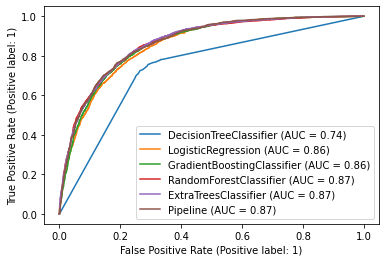

In [103]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(grid_clf_best, x_train, y_train)

plot_roc_curve(log, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_gbdt_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_rf_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_etc_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(svm_best, x_train, y_train, ax=disp.ax_)

plt.legend(prop = {'size':10}, loc='lower right')
plt.show()

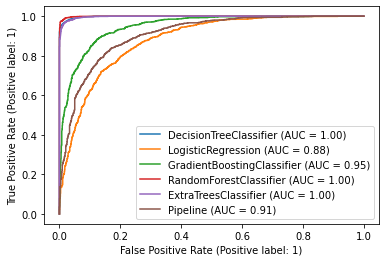

In [104]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(grid_clf_best, x_test, y_test)

plot_roc_curve(log, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_gbdt_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_rf_best,x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_etc_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svm_best,x_test, y_test, ax=disp.ax_)

plt.legend(prop = {'size':10}, loc='lower right')
plt.show()

# Observation:
    Extratree Classifier gives best AUC score ,so it is best fit model for this dataset.

In [105]:
grid_etc_best.fit(x_train, y_train)
y_pred = grid_etc_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ',grid_etc_best.score(x_train, y_train))
print('testing score : ', grid_etc_best.score(x_test, y_test))

accu score :  0.8202551217626595


cof_mat:  [[1046  246]
 [ 219 1076]]


classification report: 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1292
           1       0.81      0.83      0.82      1295

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587

-----------
-----------
training score :  0.9712665893570416
testing score :  0.8202551217626595


# Confusion Matrix

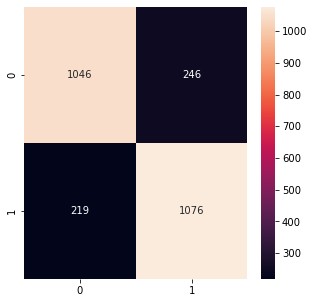

In [106]:
conf = confusion_matrix (y_test, y_pred)

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf, annot = True, fmt = ".0f")
plt.show()

# Saving Model

In [107]:
import pickle
pickle.dump(grid_etc_best, open("Customer_Churn_Classification_model", "wb"))
load_Customer_Churn_Classification_model= pickle.load(open("Customer_Churn_Classification_model", "rb"))


In [108]:
y_pred = load_Customer_Churn_Classification_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=7)

,Predicted Values,Actual Values
1346,1,1
487,1,1
1782,1,1
2460,0,0
898,1,1
1740,0,0
2360,1,1
